# Step 4

Make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

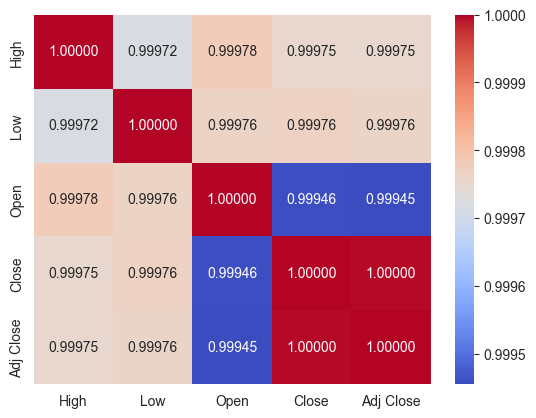

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, norm

res = pd.read_csv('data/NVIDIA Corporation.csv', header=0, encoding='unicode_escape')
df = res.drop(columns=['Date', 'Volume'])

# Estimate pair correlation coefficients
corr_matrix = df.corr()

# Calculate confidence intervals and significance levels for pair correlation coefficients
corr_ci = []
corr_p = []
for i in range(5):
    for j in range(i + 1, 5):
        corr, p = pearsonr(df.iloc[:, i], df.iloc[:, j])
        corr_ci.append((corr - 1.96 * np.sqrt((1 - corr ** 2) / len(df)),
                        corr + 1.96 * np.sqrt((1 - corr ** 2) / len(df))))
        corr_p.append(p)

# Visualize resulting correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.5f')
plt.show()

In [30]:
def estimation(variable, target, alpha=0.05):
    r, pvalue = pearsonr(variable, target)

    r_to_z = np.arctanh(r)
    se = 1 / np.sqrt(variable.count() - 3)
    z = norm.ppf(1 - alpha / 2)
    int_a, int_b = r_to_z - z * se, r_to_z + z * se
    int_a, int_b = np.tanh(int_a), np.tanh(int_b)

    print('Correlation Coefficient: {:.5f}'.format(r))
    print('Confidence Interval: ({:.5f}, {:.5f})'.format(int_a, int_b))
    print('Significance Level:', pvalue)

In [31]:
print("Information for variable pair 'Adj Close' - 'High'")
estimation(df['Adj Close'], df['High'])

Information for variable pair 'Adj Close' - 'High'
Correlation Coefficient: 0.99975
Confidence Interval: (0.99974, 0.99976)
Significance Level: 0.0


In [32]:
print("Information for variable pair 'Adj Close' - 'Low'")
estimation(df['Adj Close'], df['Low'])

Information for variable pair 'Adj Close' - 'Low'
Correlation Coefficient: 0.99976
Confidence Interval: (0.99975, 0.99977)
Significance Level: 0.0


In [33]:
print("Information for variable pair 'Adj Close' - 'Open'")
estimation(df['Adj Close'], df['Open'])

Information for variable pair 'Adj Close' - 'Open'
Correlation Coefficient: 0.99945
Confidence Interval: (0.99943, 0.99948)
Significance Level: 0.0


In [34]:
print("Information for variable pair 'Adj Close' - 'Close'")
estimation(df['Adj Close'], df['Close'])

Information for variable pair 'Adj Close' - 'Close'
Correlation Coefficient: 1.00000
Confidence Interval: (1.00000, 1.00000)
Significance Level: 0.0


(array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]]),
 array([0.99861915, 0.99878914, 0.99895914, 0.99912913, 0.99929912,
        0.99946912, 0.99963911, 0.99980911, 0.9999791 , 1.0001491 ,
        1.00031909]),
 <a list of 10 BarContainer objects>)

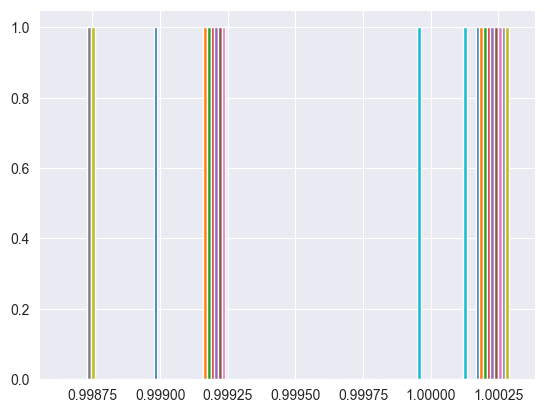

In [35]:
plt.hist(corr_ci)